In [109]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

In [110]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [111]:
df=pd.read_csv("EastWestAirlines.csv")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [112]:
#column rename
df.rename(columns={'ID#':'ID', 'Award?':'Award'},inplace=True)
df

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# Data Exploration

In [114]:
df.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [116]:
# different cc_miles have different max values.
# so, we want to check what values these columns can take

print('unique_cc1',df.cc1_miles.unique())
print('unique_cc2',df.cc2_miles.unique())
print('unique_cc3',df.cc3_miles.unique())


unique_cc1 [1 4 3 2 5]
unique_cc2 [1 2 3]
unique_cc3 [1 3 2 4 5]


# Missing values

In [118]:
df.isna().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

#As we can see that there is no any missing value so there is no need to impute it.


# Duplicated Values

In [121]:
# Additionally we check the data for any duplicate values, now this can be an optional check depending on the data being used
df.duplicated().sum()

0

In [122]:
df[df.duplicated()]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award


There are no missing / Null and Duplicated values either in columns or rows, so we can move on to the next step, which is Exploratory Data Analy

# Exploratory DAta Analysis

Lets analyze the features by creating histograms to understand the distribution

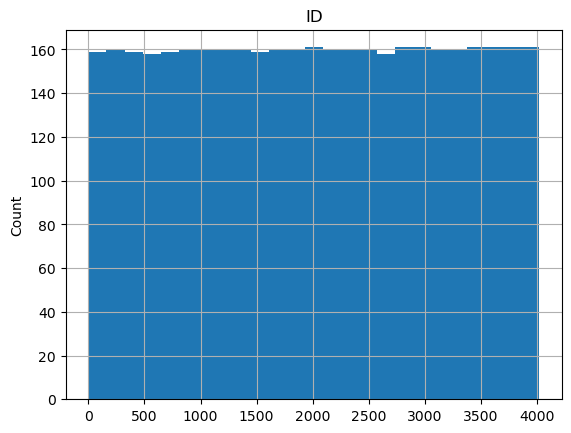

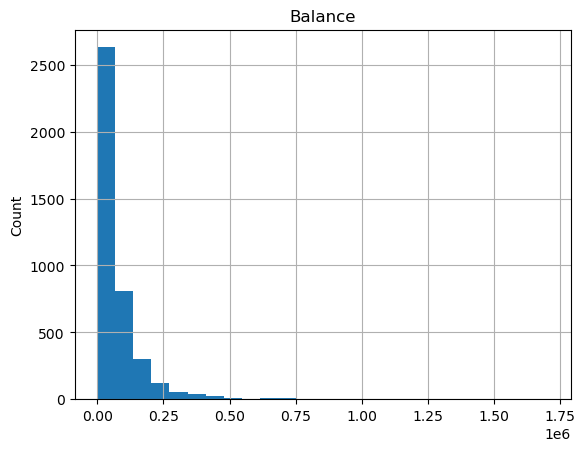

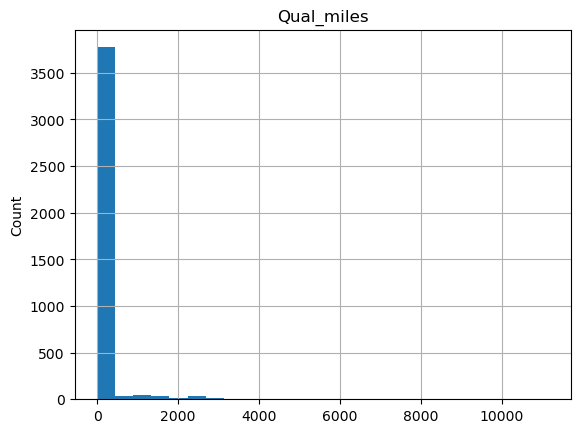

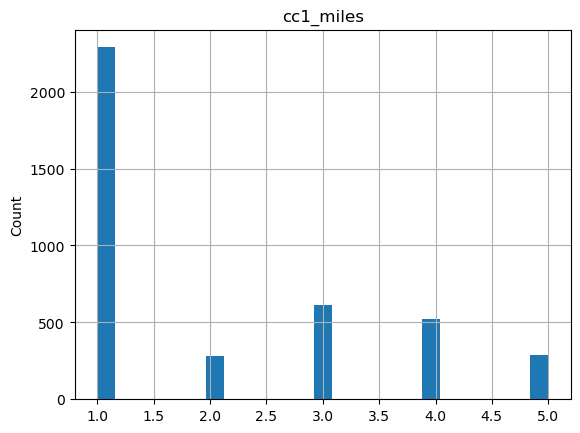

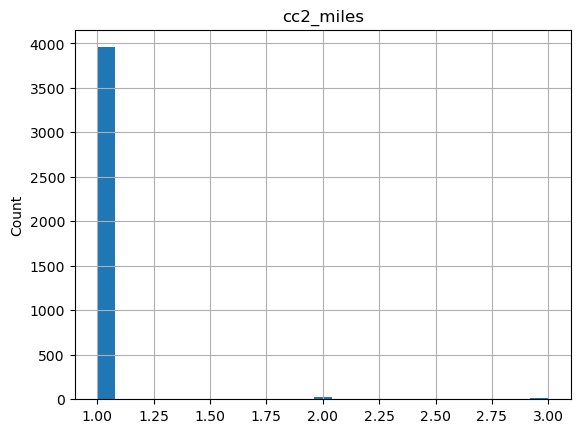

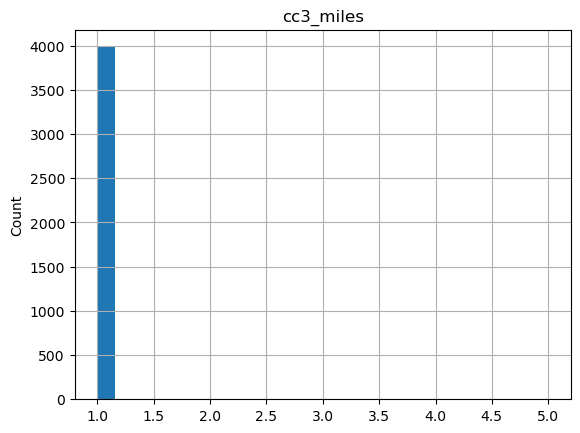

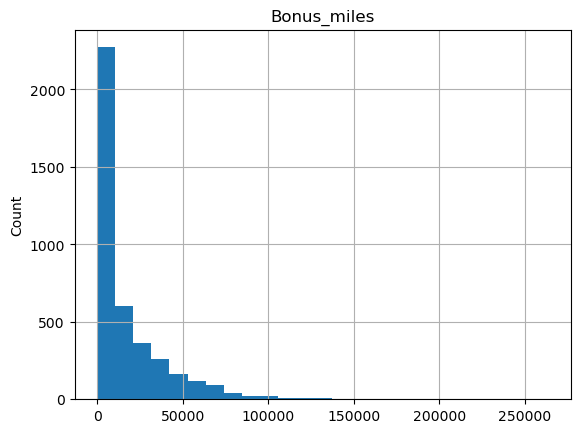

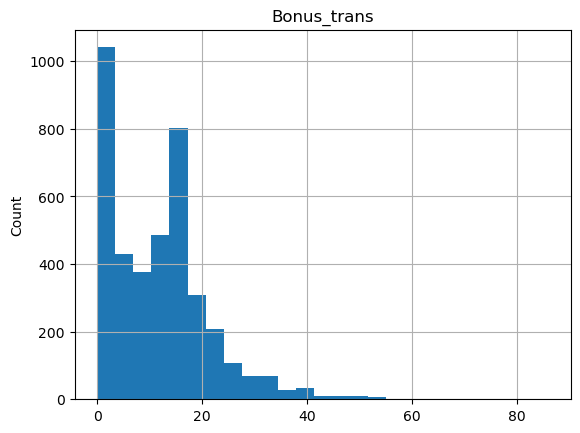

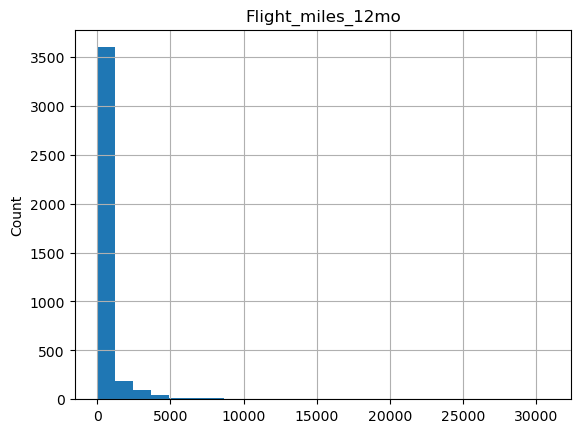

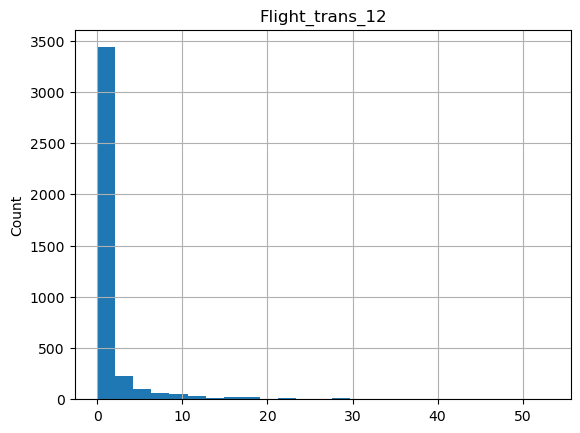

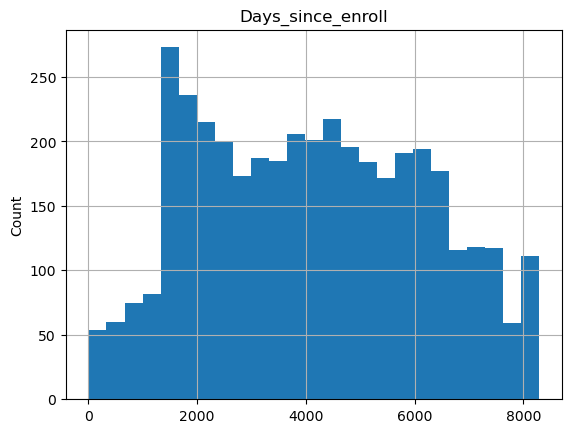

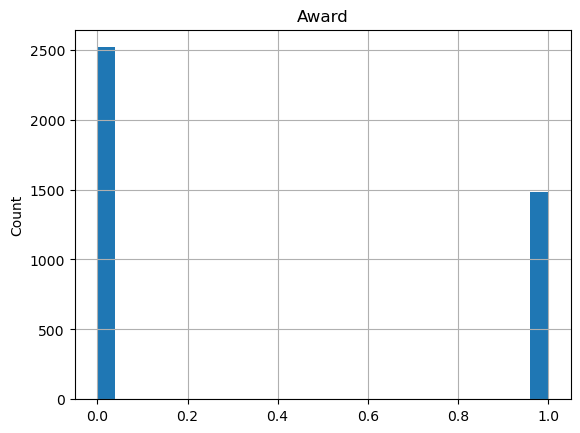

In [126]:
for feature in df.columns:
    df=df.copy()
    df[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()
    

# Outliers Detection

In [128]:
df.columns

Index(['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

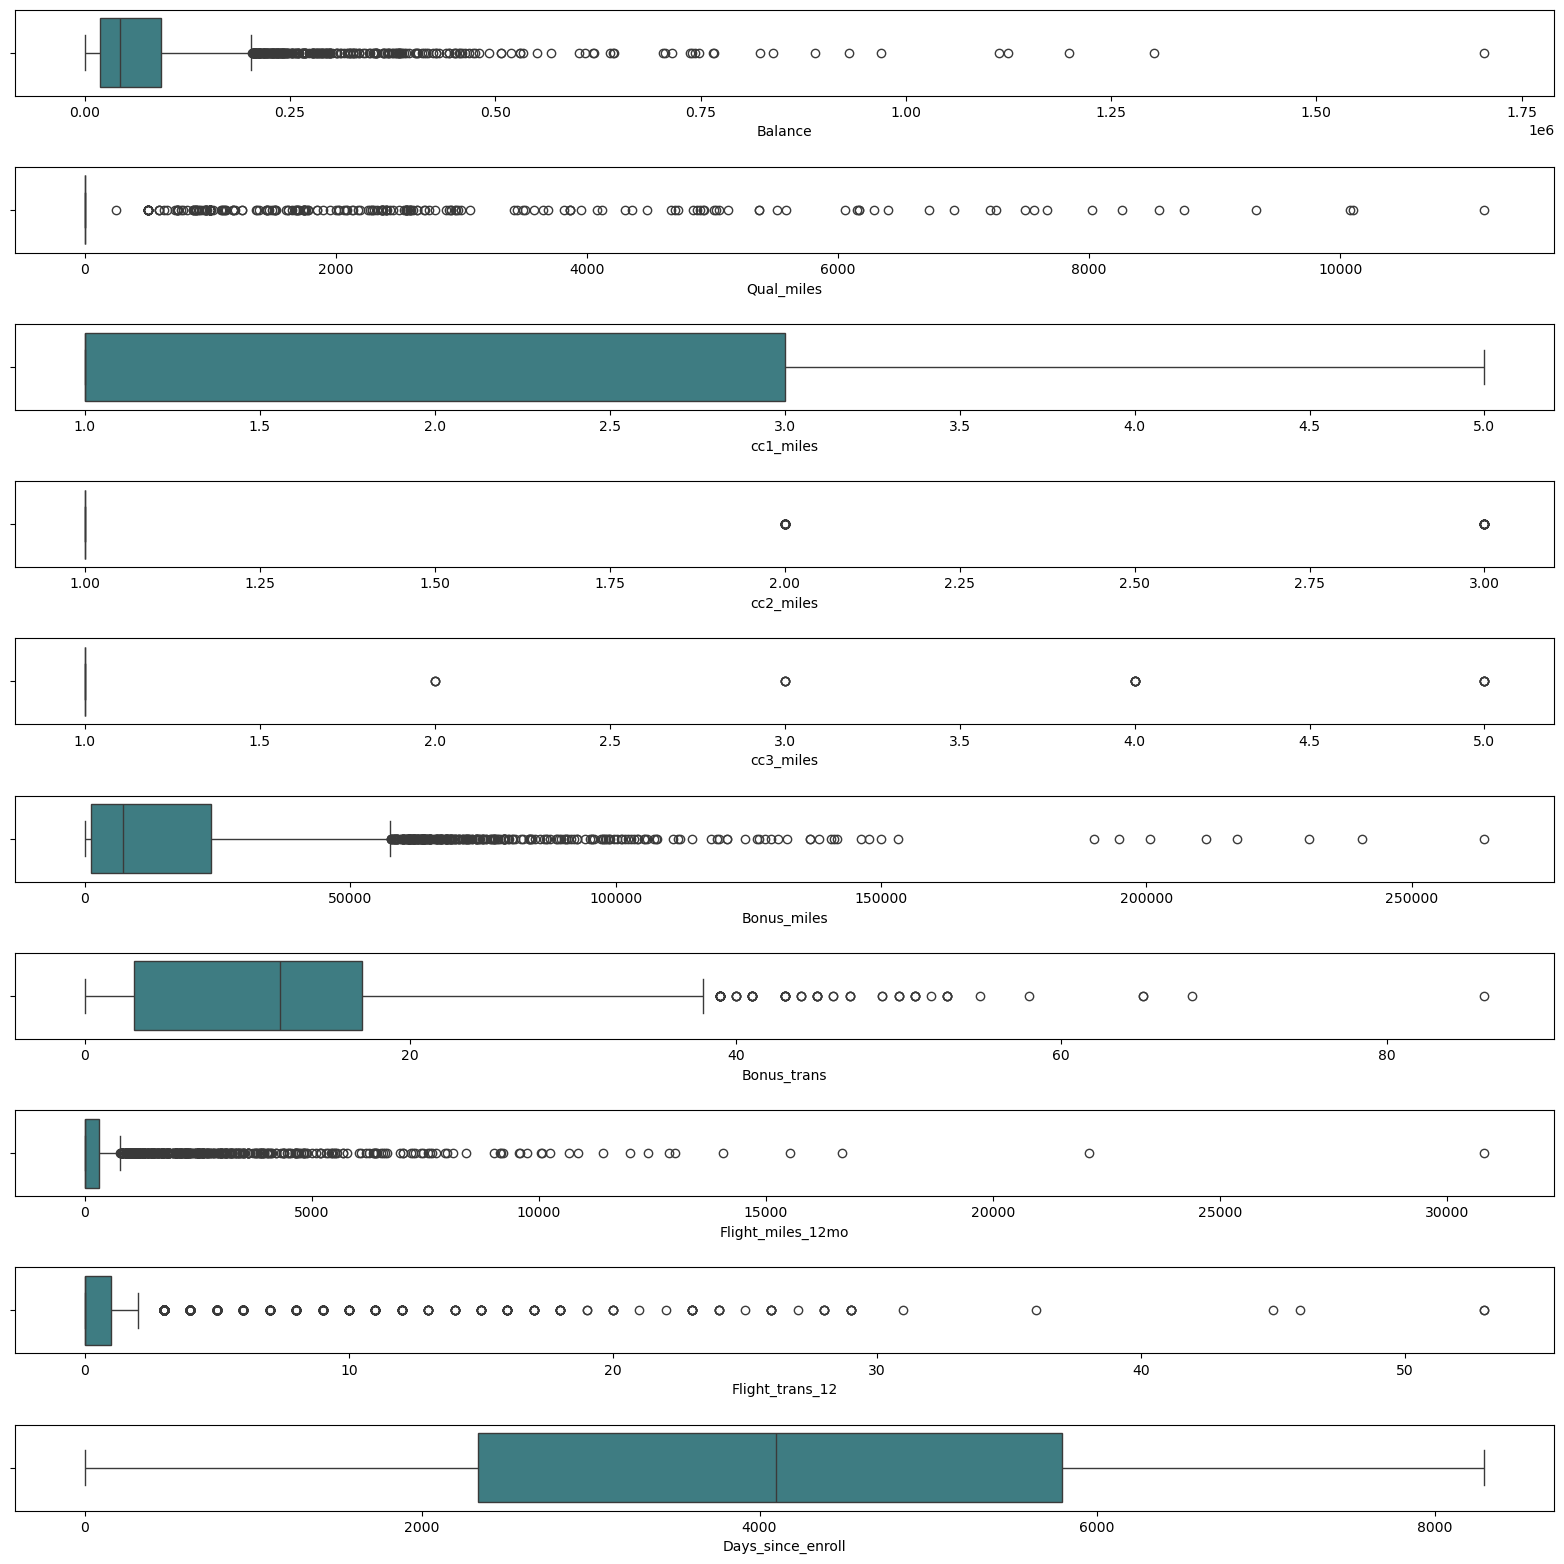

In [129]:
ot=df.copy() 
fig, axes=plt.subplots(10,1,figsize=(16,16),sharex=False,sharey=False)
sns.boxplot(x='Balance',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Qual_miles',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='cc1_miles',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='cc2_miles',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='cc3_miles',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Bonus_miles',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Bonus_trans',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Flight_miles_12mo',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='Flight_trans_12',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='Days_since_enroll',data=ot,palette='crest',ax=axes[9])
plt.tight_layout(pad=2.0)

# Data Visualization

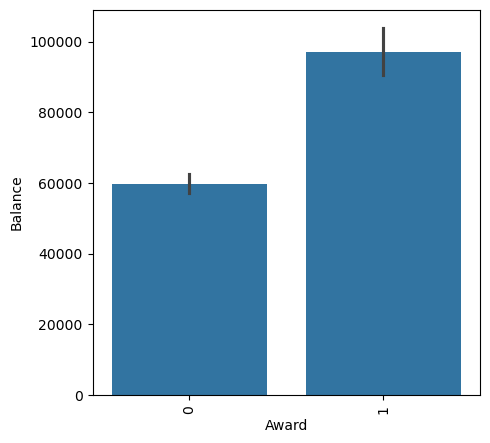

In [131]:
plt.figure(figsize = (5,5))
Balance = df[['Award','Balance']].sort_values('Balance', ascending = False)
ax = sns.barplot(x='Award', y='Balance', data= Balance)
ax.set(xlabel = 'Award', ylabel= 'Balance')
plt.xticks(rotation=90)
plt.show()


In [132]:
# what is correlated with Balance?

corr_matrix = df.corr()
corr_matrix["Balance"].sort_values(ascending=False)

Balance              1.000000
Bonus_miles          0.403487
cc1_miles            0.338344
Bonus_trans          0.324935
Days_since_enroll    0.263129
Flight_trans_12      0.255700
Flight_miles_12mo    0.217551
Award                0.178494
Qual_miles           0.108722
cc3_miles            0.035243
cc2_miles           -0.008804
ID                  -0.243737
Name: Balance, dtype: float64

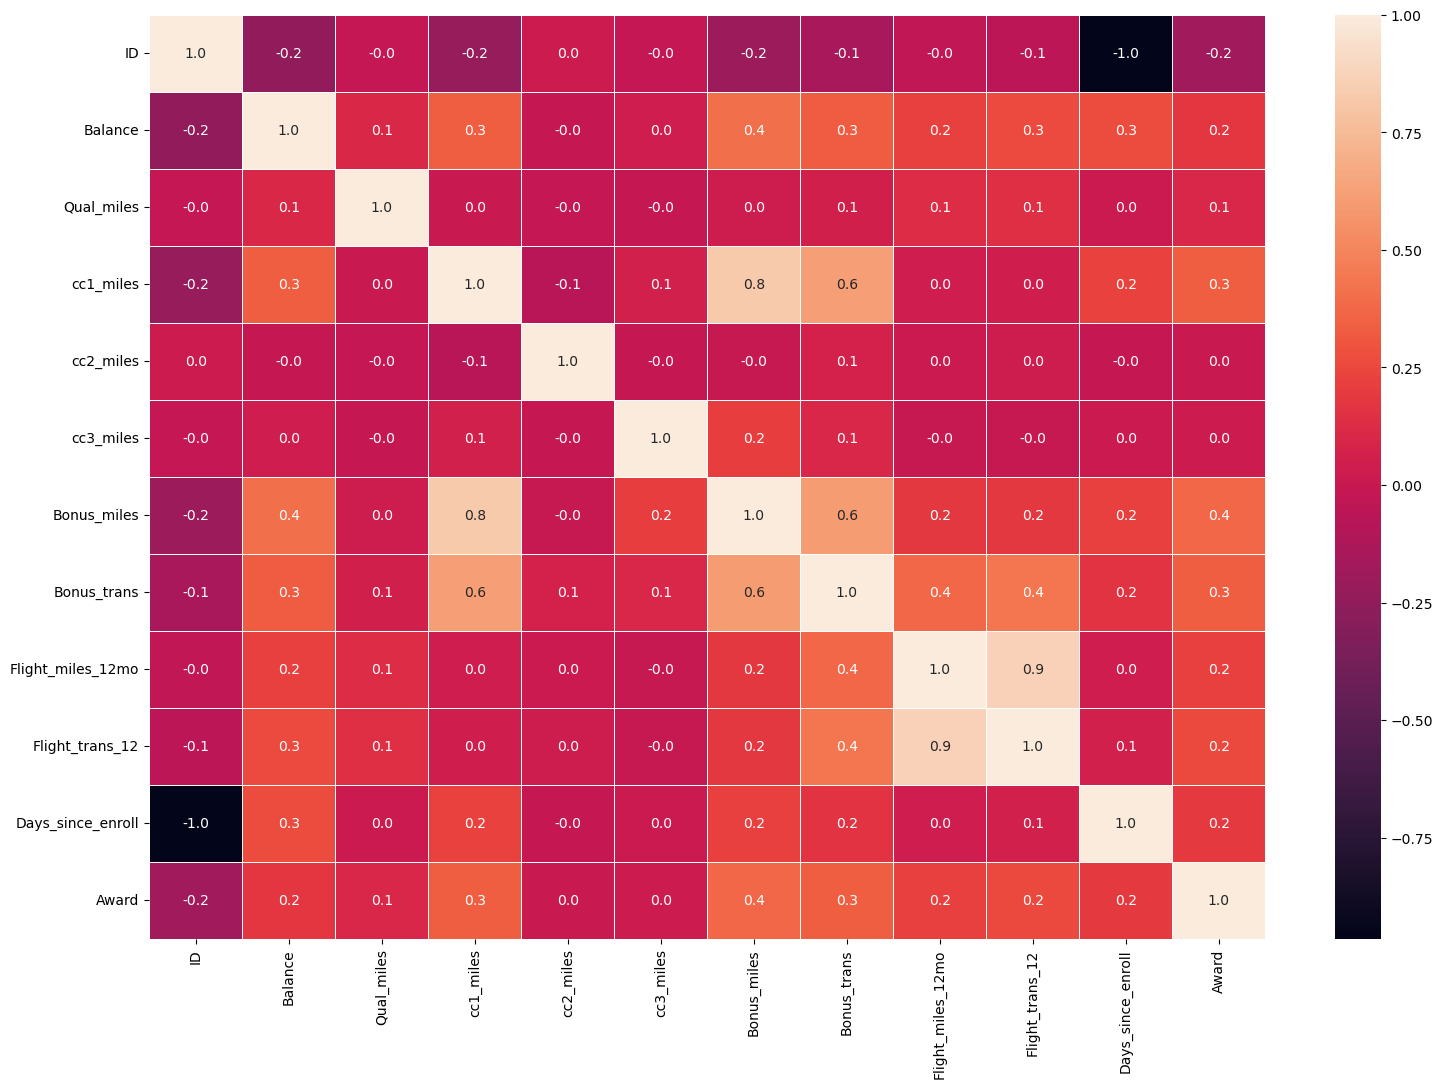

In [133]:
# correlation heatmap

f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(df.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()


# Data Preprocessing

1] Standiadized the data

In [136]:
standard_scaler=StandardScaler()
std_df=standard_scaler.fit_transform(df)
std_df


array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

# Normalizing the data

In [138]:
# Using Minmaxscaler for accuracy result comparison
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(df)
minmax_df.shape


(3999, 12)

# KMeans Clustering

K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.
The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid. The first step in k-means is to pick the number of clusters, k. Then keep the iterations running until one of the below satisifes:

Centroids of newly formed clusters do not change
Points remain in the same cluster
Maximum number of iterations are reached


# Elbow Method for Determining Cluster Amount

Standard Scaler Applied On Data


In [143]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(std_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,1,47988.000000
1,2,39018.790909
2,3,34535.356210
3,4,30616.582856
4,5,26894.799956
5,6,23490.749029
6,7,20923.335258
7,8,19329.960768
8,9,17986.255286
9,10,16850.318257


In [144]:
clusters_df

,num_clusters,cluster_errors
0,1,47988.000000
1,2,39018.790909
2,3,34535.356210
3,4,30616.582856
4,5,26894.799956
5,6,23490.749029
6,7,20923.335258
7,8,19329.960768
8,9,17986.255286
9,10,16850.318257


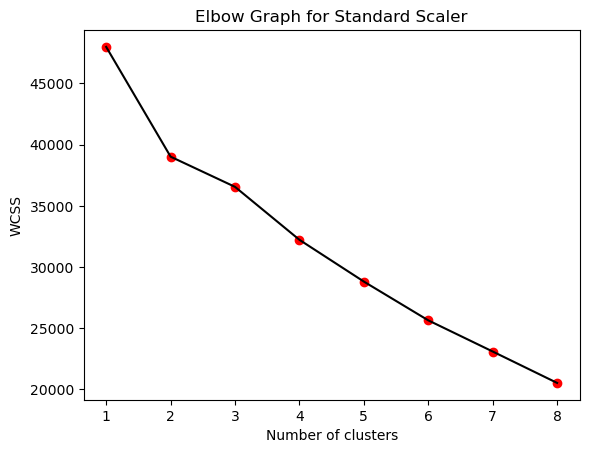

In [145]:
# within-cluster sum-of-squares criterion 
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 
# random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change. 

wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

There is no clear "elbow" visible. A choice of 3 or 4 clusters seems to be fair. Let's see the silhouette score

Silhouette Score

The silhouette analysis measures how well an observation is clustered and it estimates the average distance between clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters.

In [148]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(std_df)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(std_df, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

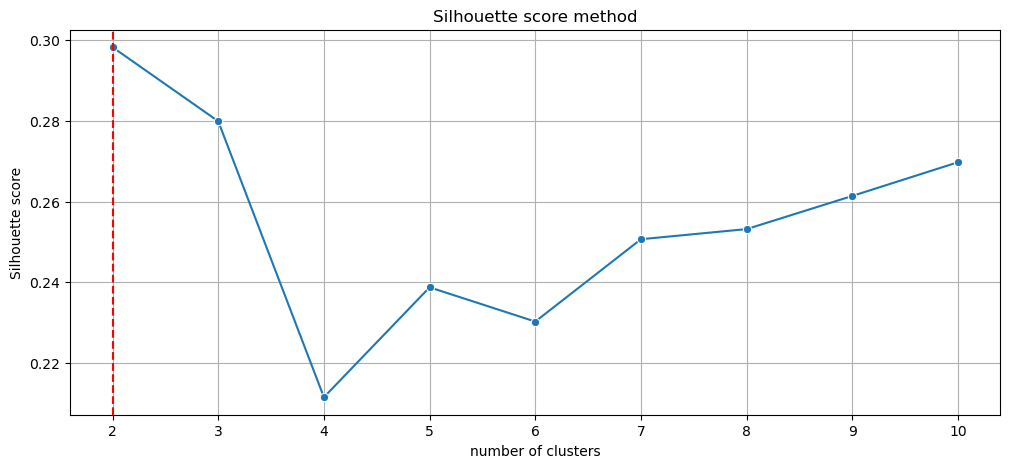

In [149]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=n_clusters, y=s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

Silhouette score method indicates the best options would be respectively 2 clusters.

In [151]:
# With the elbow method, the ideal number of clusters to use was 6.
# We will also use the Silhouette score to determine an optimal number.

clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(std_df)
    sil_score1= sil(std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.29728279549603004
For n_clusters = 3 The average silhouette_score is : 0.2690112341329993
For n_clusters = 4 The average silhouette_score is : 0.21904460491631733
For n_clusters = 5 The average silhouette_score is : 0.22960519564327406
For n_clusters = 6 The average silhouette_score is : 0.24148419473625138
For n_clusters = 7 The average silhouette_score is : 0.2513518807339586
For n_clusters = 8 The average silhouette_score is : 0.2604090085550502
For n_clusters = 9 The average silhouette_score is : 0.25991369082847054


# Build KMeans Cluster algorithm using K=6 and Standard Scaler Applied Dataset

In [153]:
# we have found good number of cluster = 6
# model building using cluster numbers = 6

model_kmeans = KMeans(n_clusters=6, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_df)
y_predict_kmeans.shape

(3999,)

In [154]:
# these are nothing but cluster labels...

y_predict_kmeans

array([5, 5, 5, ..., 0, 1, 1])

In [155]:
model_kmeans.labels_


array([5, 5, 5, ..., 0, 1, 1])

In [156]:
# cluster centres associated with each lables

model_kmeans.cluster_centers_

array([[ 4.33919346e-01, -2.22150038e-01,  1.03535285e-01,
        -1.24055513e-01,  2.39886464e-02, -6.27665798e-02,
        -1.64990294e-01,  1.23300106e-02, -1.85571024e-02,
        -1.64303092e-02, -4.12503357e-01,  1.29457604e+00],
       [ 9.78768863e-01, -3.47973831e-01, -8.38936294e-02,
        -5.03524837e-01,  6.05192645e-03, -6.27665798e-02,
        -4.73327050e-01, -4.31806686e-01, -2.16970760e-01,
        -2.45292260e-01, -9.75677514e-01, -7.66919299e-01],
       [-2.72814066e-01,  1.24644267e+00,  9.29651186e-01,
         1.22078573e-01,  1.82045371e-01, -6.27665798e-02,
         6.82017056e-01,  1.76369044e+00,  3.71761841e+00,
         4.04739425e+00,  3.09798595e-01,  9.61158856e-01],
       [-3.01522483e-01,  6.39719256e-01, -8.44329231e-02,
         1.02208440e+00, -9.82418871e-02,  1.56462993e+01,
         3.17969131e+00,  1.71461374e+00,  3.32926913e-02,
         5.96953922e-02,  2.39872612e-01,  3.37527346e-01],
       [-5.99427878e-01,  6.93924879e-01, -5.8012590

In [157]:
# within-cluster sum of squared

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model_kmeans.inertia_

25280.704767772826

In [158]:
#Assign clusters to the data set
df_1 = pd.read_csv("EastWestAirlines.csv")
df_1.rename({'ID#':'ID', 'Award?':'Award'}, inplace=True, axis=1)
df_1['Kmeans_label'] = model_kmeans.labels_

In [159]:
# Group data by Clusters (K=6)
df_1.groupby('Kmeans_label').agg(['mean'])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_label,,,,,,,,,,,,
0,2518.434586,51216.809023,224.206015,1.888722,1.018045,1.000000,13160.669173,11.720301,434.075188,1.311278,3266.790977,0.995489
1,3150.797407,38538.418152,79.217180,1.366288,1.015397,1.000000,5714.969206,7.455429,156.289303,0.443274,2103.905997,0.000000
2,1698.186207,199196.710345,863.262069,2.227586,1.041379,1.000000,33614.158621,28.537931,5664.848276,16.724138,4758.255172,0.834483
3,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
4,1319.111940,143523.324627,139.626866,4.149254,1.002488,1.002488,49623.110697,19.699005,368.710199,1.133085,5353.451493,0.645522
5,1023.454225,58423.350352,79.971831,1.393486,1.016725,1.000880,5790.643486,7.926937,204.926056,0.628521,5843.444542,0.150528


# Hierarchical Clustering Algorithm

Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics.One of the major considerations in using the K-means algorithm is deciding the value of K beforehand. The hierarchical clustering algorithm does not have this restriction.The output of the hierarchical clustering algorithm is quite different from the K-mean algorithm as well. It results in an inverted tree-shaped structure, called the dendrogram.

Dendroram On minmaxScaler dataset

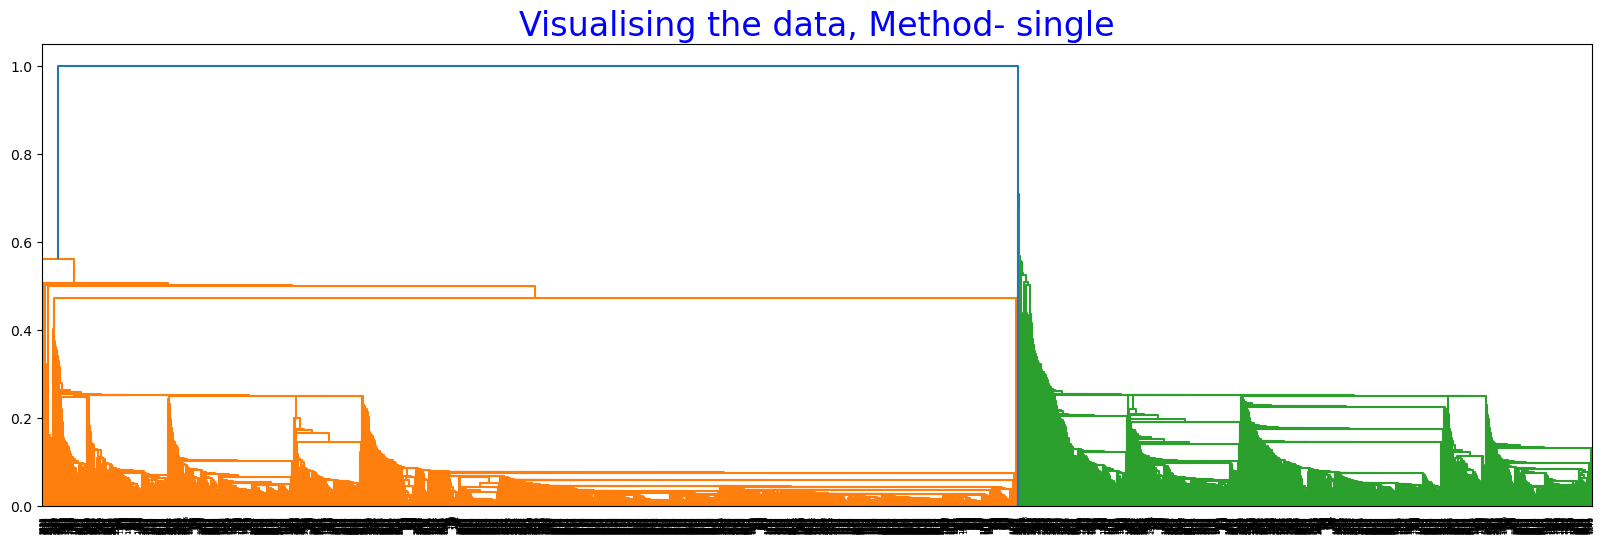

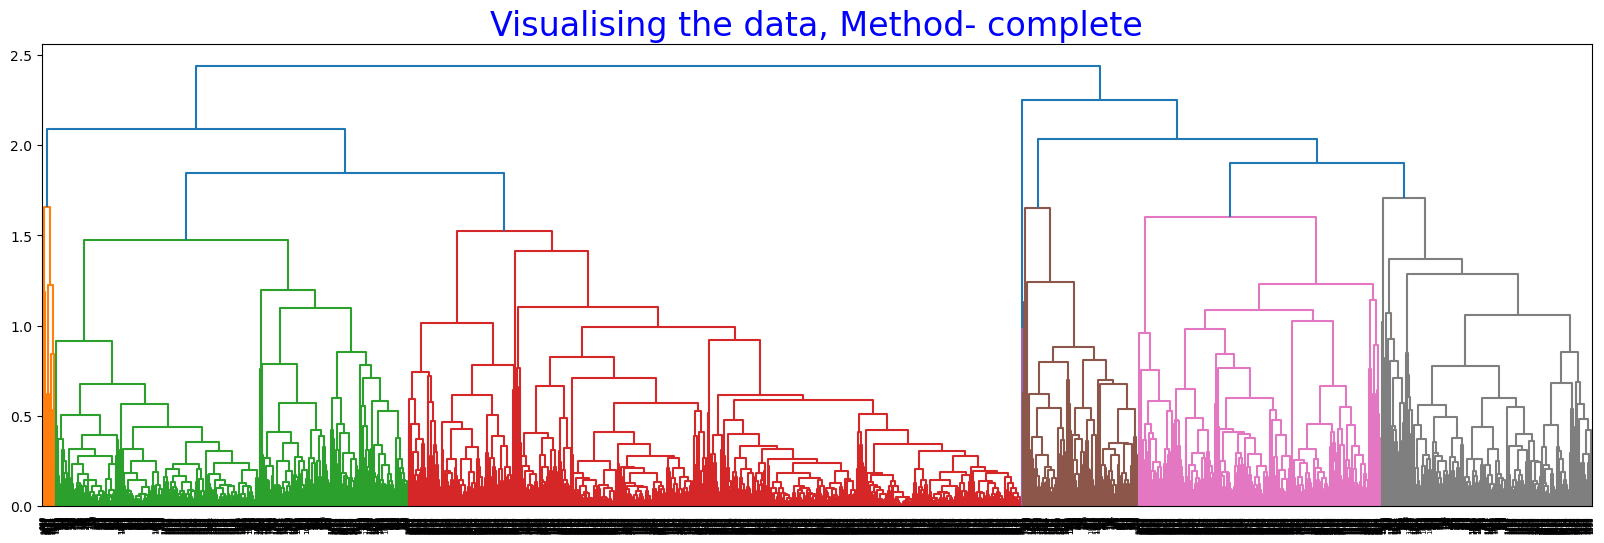

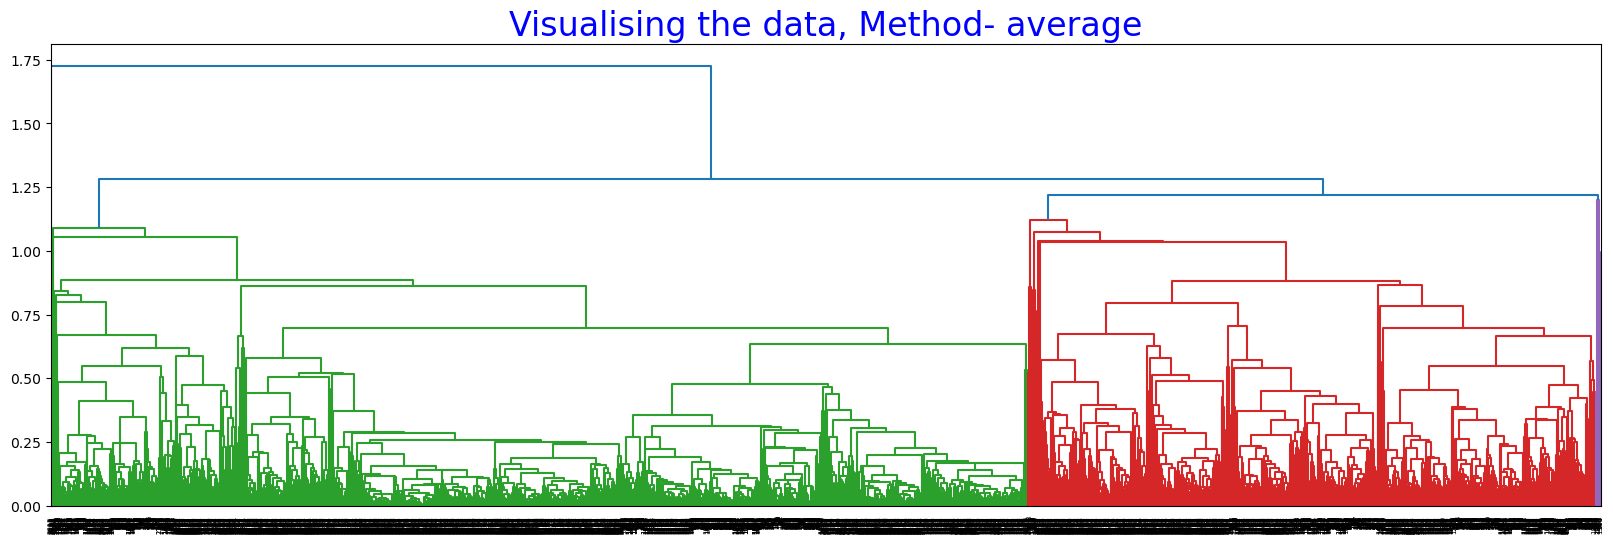

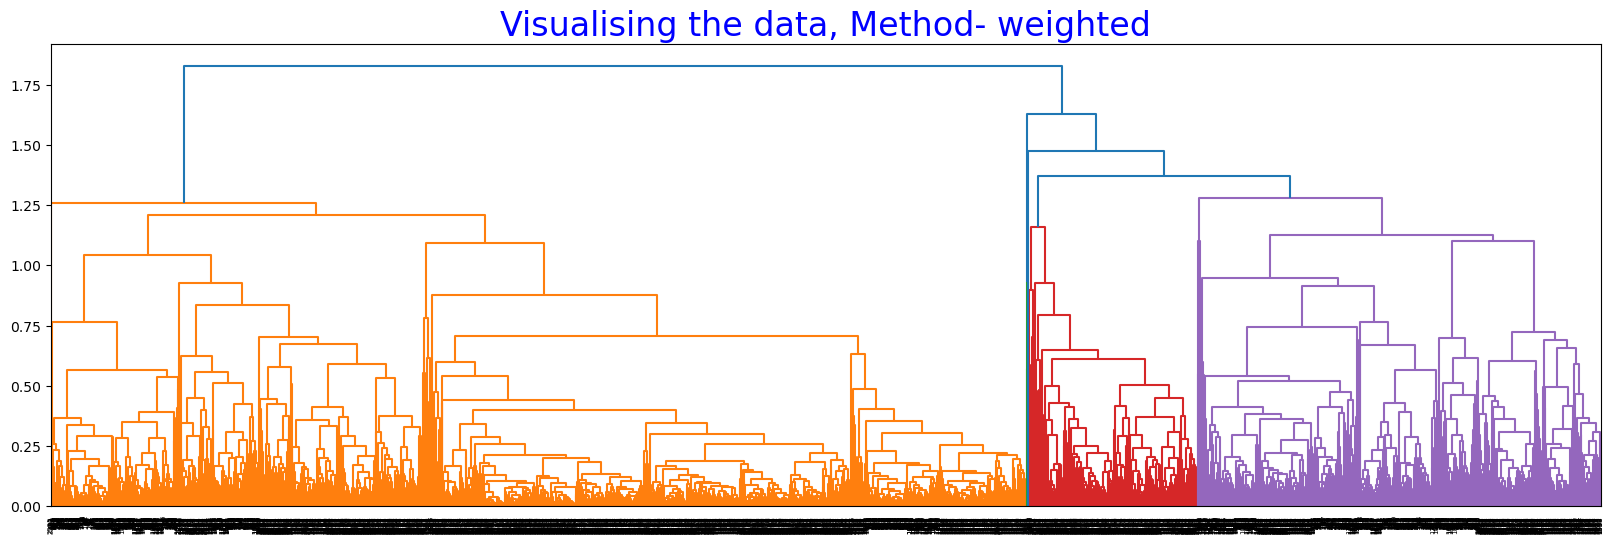

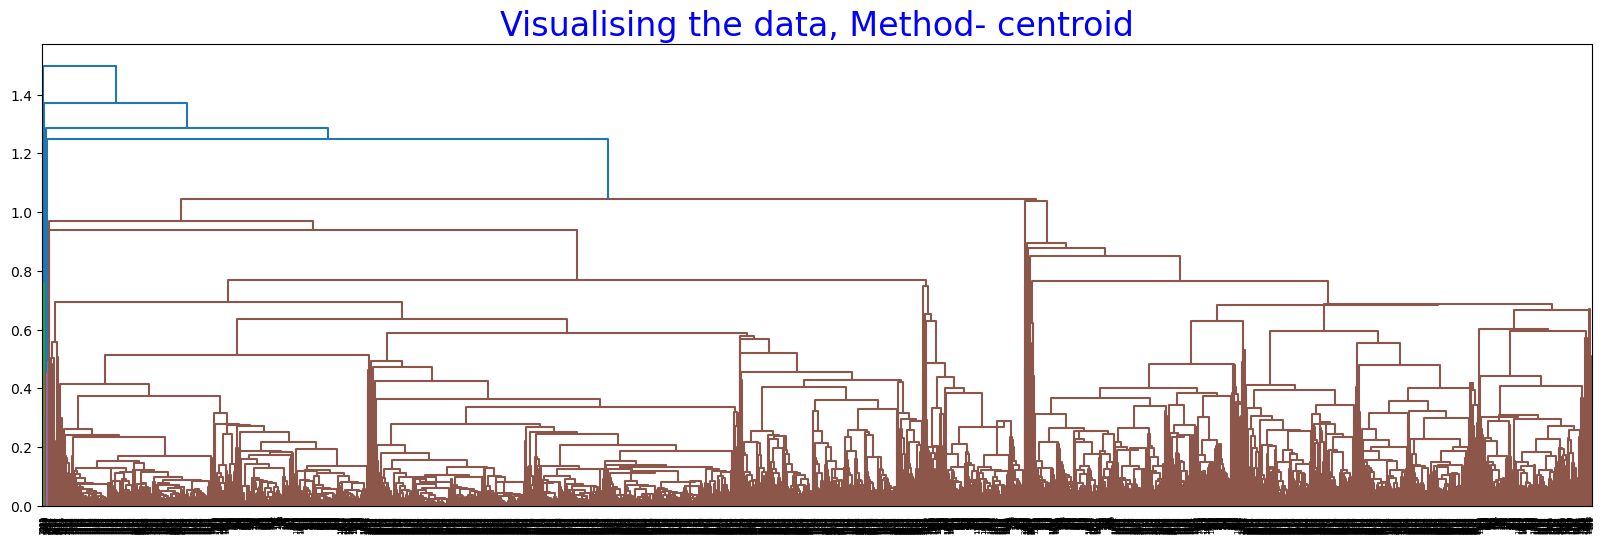

In [ ]:
# Applying Dendrogram on data. Or you may apply it on Standardized/normalized indepedent variable data.
# Here diffrent linkage method from hyperparameter is used to see diff between methods for understanding. 
# Ward method is commanly used since it is simpler to visualize understanding.
# Find number of cluster's using color coding of dendrogram. Each color indicates one cluster.

for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(minmax_df, method = methods,optimal_ordering=False))

In [ ]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(minmax_df)
        silhouette_score1 = sil(minmax_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()
For n_clusters = 2 The average silhouette_score with linkage- ward : 0.535930510919477
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.47040913679492186
For n_clusters = 2 The average silhouette_score with linkage- average : 0.47040913679492186
For n_clusters = 2 The average silhouette_score with linkage- single : 0.535930510919477

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.43550164891825044
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.5318787367232326
For n_clusters = 3 The average silhouette_score with linkage- average : 0.39619766243707655
For n_clusters = 3 The average silhouette_score with linkage- single : 0.5351606918177734

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.42494300944261365
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.46459708515197673
For n_clusters = 4 The average silhouette_score with linkage- average : 0.5286018409871408
For n_clusters = 4 The average silhouette_score with linkage- single : 0.48129679558120275

For n_clusters = 5 The average silhouette_score with linkage- ward : 0.3762586351398372
For n_clusters = 5 The average silhouette_score with linkage- complete : 0.4167248248554338
For n_clusters = 5 The average silhouette_score with linkage- average : 0.5082555071160846
For n_clusters = 5 The average silhouette_score with linkage- single : 0.48005487141025094

For n_clusters = 6 The average silhouette_score with linkage- ward : 0.33447794301195294
For n_clusters = 6 The average silhouette_score with linkage- complete : 0.4172318835123988
For n_clusters = 6 The average silhouette_score with linkage- average : 0.4872677894382957
For n_clusters = 6 The average silhouette_score with linkage- single : 0.4327930185753205

For n_clusters = 7 The average silhouette_score with linkage- ward : 0.32889569025182047
For n_clusters = 7 The average silhouette_score with linkage- complete : 0.4161868994032843
For n_clusters = 7 The average silhouette_score with linkage- average : 0.43873250506611094
For n_clusters = 7 The average silhouette_score with linkage- single : 0.4313535297638312

For n_clusters = 8 The average silhouette_score with linkage- ward : 0.3125764904816174
For n_clusters = 8 The average silhouette_score with linkage- complete : 0.39120686651419934
For n_clusters = 8 The average silhouette_score with linkage- average : 0.4087022964575043
For n_clusters = 8 The average silhouette_score with linkage- single : 0.39132817868911945



 # Dendrogram on standard scaler applied on data

In [ ]:
n_clusters = [2,3,4,5,6,7,8,9,10]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(std_df)
        silhouette_score1 = sil(std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()
For n_clusters = 2 The average silhouette_score with linkage- ward : 0.28926595242577247
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.8111134025692677
For n_clusters = 2 The average silhouette_score with linkage- average : 0.8111134025692677
For n_clusters = 2 The average silhouette_score with linkage- single : 0.8562820070415407

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.2940432062008608
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.7760836053602842
For n_clusters = 3 The average silhouette_score with linkage- average : 0.7838667595062349
For n_clusters = 3 The average silhouette_score with linkage- single : 0.7350532148998382

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.30814152852022786
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.5985727763092806
For n_clusters = 4 The average silhouette_score with linkage- average : 0.7731120442583631
For n_clusters = 4 The average silhouette_score with linkage- single : 0.5380065449865503

For n_clusters = 5 The average silhouette_score with linkage- ward : 0.3098805307874414
For n_clusters = 5 The average silhouette_score with linkage- complete : 0.5625737661941762
For n_clusters = 5 The average silhouette_score with linkage- average : 0.7700180807329777
For n_clusters = 5 The average silhouette_score with linkage- single : 0.5378591358408883

For n_clusters = 6 The average silhouette_score with linkage- ward : 0.3192511970153055
For n_clusters = 6 The average silhouette_score with linkage- complete : 0.5404241979396106
For n_clusters = 6 The average silhouette_score with linkage- average : 0.6618116714629186
For n_clusters = 6 The average silhouette_score with linkage- single : 0.5364116456429503

For n_clusters = 7 The average silhouette_score with linkage- ward : 0.18965334676868836
For n_clusters = 7 The average silhouette_score with linkage- complete : 0.5418820074020084
For n_clusters = 7 The average silhouette_score with linkage- average : 0.6345583525022677
For n_clusters = 7 The average silhouette_score with linkage- single : 0.5372286905767694

For n_clusters = 8 The average silhouette_score with linkage- ward : 0.1890586470843928
For n_clusters = 8 The average silhouette_score with linkage- complete : 0.5354664617626079
For n_clusters = 8 The average silhouette_score with linkage- average : 0.6205577093313711
For n_clusters = 8 The average silhouette_score with linkage- single : 0.53652881674395

For n_clusters = 9 The average silhouette_score with linkage- ward : 0.1951894366329298
For n_clusters = 9 The average silhouette_score with linkage- complete : 0.5313341704697034
For n_clusters = 9 The average silhouette_score with linkage- average : 0.6158172248186
For n_clusters = 9 The average silhouette_score with linkage- single : 0.5335253557401146

For n_clusters = 10 The average silhouette_score with linkage- ward : 0.20121590768292186
For n_clusters = 10 The average silhouette_score with linkage- complete : 0.41505057280945407
For n_clusters = 10 The average silhouette_score with linkage- average : 0.5868062971255262
For n_clusters = 10 The average silhouette_score with linkage- single : 0.5419230857779356



# PCA

Running PCA  of standardized data

In [ ]:
#applying PCA on std_df

# we are considering 95 % variance in n components to not loose any data

from sklearn.decomposition import PCA
pca_std = PCA(random_state=10, n_components=0.95)
pca_std_df= pca_std.fit_transform(std_df)


In [ ]:
# eigenvalues..

print(pca_std.singular_values_)

In [ ]:
print(pca_std.explained_variance_ratio*100)

In [ ]:
# Cummulative variance ratio..

# this will give an idea of, at how many no. of PCAs, the cummulative addition of
#........variance will give much information..

cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance

Silhouette Score method for PCA Standard Scaled Data

In [ ]:
n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_std_df)
        silhouette_score1 = sil(pca_std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

In [ ]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
df.groupby(['Hierarchical_labels']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering PCA MinMax Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()